In [1]:
import sys
sys.path.append('../scripts')
print (sys.version)

from run import *
from _heatmap import *
import matplotlib
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')
font = {'size': 10}
matplotlib.rc('font', **font)
convert_index = False

3.8.3 (default, Jul  2 2020, 16:21:59) 
[GCC 7.3.0]


### Analyze the 1st traj

In [2]:
matrix, xlabels, ylabels, x_axis_label, y_axis_label = master('traj_frequency', 'sample', 'sample_parameters.ini',convert_index)

### Analyze the 2nd traj

In [3]:
matrix2, xlabels2, ylabels2, x_axis_label, y_axis_label = master('traj_frequency', 'sample2', 'sample2_parameters.ini',convert_index)

### Combine two trajs information together

Text(0.5, 0, 'G protein residues')

<Figure size 432x288 with 0 Axes>

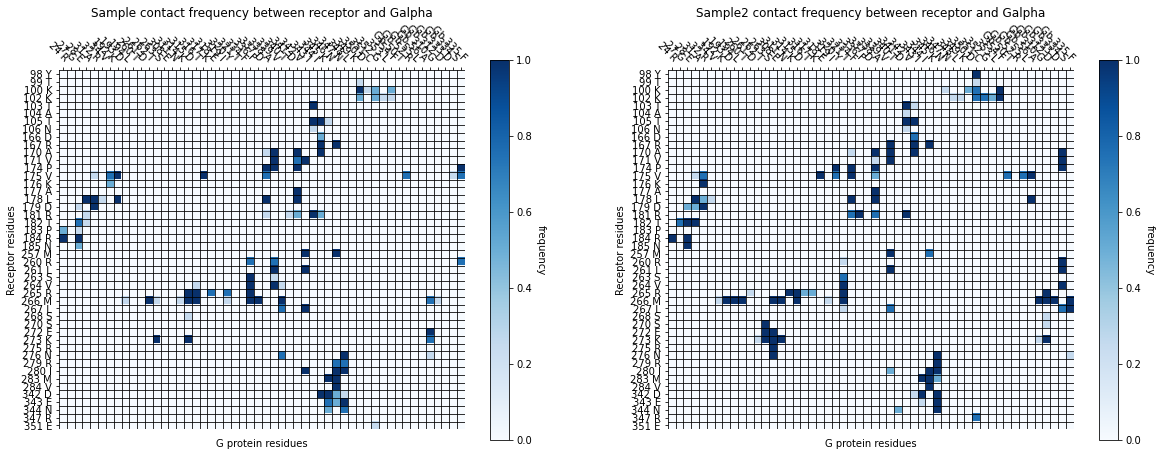

In [4]:
full_xlabels = make_union_list(xlabels, xlabels2)
full_ylabels = make_union_list(ylabels, ylabels2)

expanded_sample1_matrix = expanded_matrix(matrix, full_xlabels, full_ylabels, xlabels, ylabels)
expanded_sample2_matrix = expanded_matrix(matrix2, full_xlabels, full_ylabels, xlabels2, ylabels2)
non_rep_sample1_matrix, filtered_xlabel, filtered_ylabel = filter_duplicate_matrix(expanded_sample1_matrix,full_xlabels,full_ylabels)
non_rep_sample2_matrix, filtered_xlabel, filtered_ylabel = filter_duplicate_matrix(expanded_sample2_matrix,full_xlabels,full_ylabels)
reordered_sample1_matrix, reordered_xlabel, reordered_ylabel = reorder_matrix(non_rep_sample1_matrix, filtered_xlabel, filtered_ylabel)
reordered_sample2_matrix, reordered_xlabel, reordered_ylabel = reorder_matrix(non_rep_sample2_matrix, filtered_xlabel, filtered_ylabel)

plt.clf()
plt.figure(figsize=(20,7))
ax = plt.subplot(1, 2, 1)
im,cbar = heatmap(reordered_sample1_matrix, reordered_xlabel, reordered_ylabel, ax=ax,cmap="Blues", cbarlabel="frequency")
#texts = annotate_heatmap(im, valfmt="{x:.1f}", size=6)
plt.title('Sample contact frequency between receptor and Galpha')
plt.ylabel(y_axis_label)
plt.xlabel(x_axis_label)

ax = plt.subplot(1, 2, 2)
im,cbar = heatmap(reordered_sample2_matrix, reordered_xlabel, reordered_ylabel, ax=ax,cmap="Blues", cbarlabel="frequency")
#texts = annotate_heatmap(im, valfmt="{x:.1f}", size=6)
plt.title('Sample2 contact frequency between receptor and Galpha')
plt.ylabel(y_axis_label)
plt.xlabel(x_axis_label)

### Calculate the difference between two trajs

Text(0.5, 0, 'G protein residues')

<Figure size 432x288 with 0 Axes>

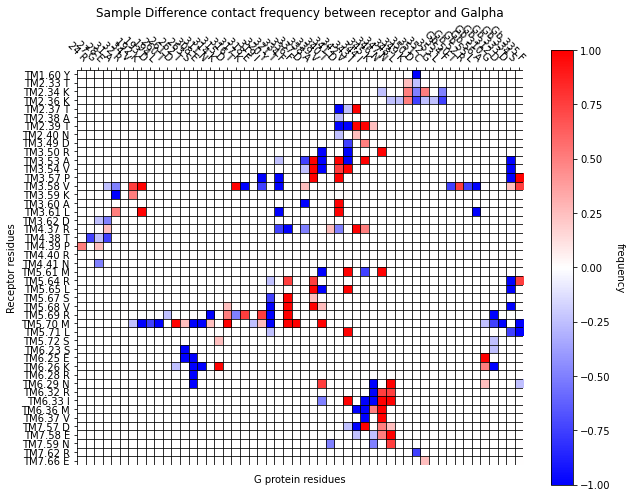

In [5]:
plt.clf()
plt.figure(figsize=(10,8))
ax = plt.subplot(1, 1, 1)
translate_xlabel, translate_ylabel = add_labels('sample2', 'sample2_parameters.ini', reordered_xlabel, reordered_ylabel)

im,cbar = heatmap(reordered_sample1_matrix-reordered_sample2_matrix, translate_xlabel, translate_ylabel,ax=ax,cmap="bwr",vmin=-1,vmax=1,cbarlabel="frequency")
#texts = annotate_heatmap(im, valfmt="{x:.1f}", size=6)
plt.title('Sample Difference contact frequency between receptor and Galpha')
plt.ylabel(y_axis_label)
plt.xlabel(x_axis_label)

In [6]:
threshold = 0.1
different_interaction_pairs=find_different_pair(reordered_sample1_matrix-reordered_sample2_matrix,reordered_xlabel, reordered_ylabel,threshold)

if not os.path.isdir('cont_freq_resids_list'):
    os.system('mkdir cont_freq_resids_list')
    
write_down_difference(different_interaction_pairs, 'cont_freq_resids_list/diff_between_sam1_vs_sam2_Ga_matrix.py')